# Logistic Regression

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets as dat
from sklearn import model_selection as mod
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import linear_model as lin
from sklearn import metrics as met

In [5]:
data_obj = dat.load_iris()

In [6]:
print(data_obj.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* This dataset has 3 different types of flowers and their petal lenghts.

In [7]:
X = data_obj.data #data
y = data_obj.target #targets

In [8]:
X.shape #150 samples 4 features

(150, 4)

In [9]:
y.shape #150 targets

(150,)

In [10]:
data_obj.target_names #multiclass classification

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
data_obj.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Transform this problem into a binary classification from multiclass classification

In [12]:
y_binary = (y==2)
y_binary

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

* split into train and test

In [13]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y_binary, test_size=0.33, random_state=42) 
#need to insert y binary so its a boolean classification

In [14]:
X_train.shape

(100, 4)

In [15]:
y_train.shape

(100,)

In [16]:
X_test.shape

(50, 4)

In [17]:
y_test.shape

(50,)

In [18]:
pipe = pip.Pipeline([
    ("scaler",pre.StandardScaler()),
    ("log_reg", lin.LogisticRegression(random_state=42))
])
mod.cross_val_score(pipe, X_train, y_train,cv=3,
                    scoring="accuracy").mean() # default scoring is accuracy, returns an array

0.9497920380273323

* to find the prediction scores we need to fit first

In [19]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred[:5]

array([False, False,  True, False, False])

In [20]:
y_proba = pipe.predict_proba(X_test) #predict probability, only for logistic
np.set_printoptions(suppress=True) #dont use scientific notation
y_proba[:5] #shows how sure the algorithm is about their choice.

array([[0.86457193, 0.13542807],
       [0.99994701, 0.00005299],
       [0.00441078, 0.99558922],
       [0.75666493, 0.24333507],
       [0.69233257, 0.30766743]])

In [21]:
y_pred=mod.cross_val_predict(pipe,X_train,y_train, cv=3, method="predict")
y_pred[:5]

array([False,  True, False, False,  True])

In [22]:
y_proba=mod.cross_val_predict(pipe,X_train,y_train, cv=3, method="predict_proba")
y_proba[:5]

array([[0.88995981, 0.11004019],
       [0.04144378, 0.95855622],
       [0.778072  , 0.221928  ],
       [0.99984782, 0.00015218],
       [0.04408795, 0.95591205]])

In [23]:
met.accuracy_score(y_train, y_pred)

0.95

In [24]:
mat = met.confusion_matrix(y_train,y_pred)
mat

array([[63,  3],
       [ 2, 32]], dtype=int64)

<AxesSubplot:>

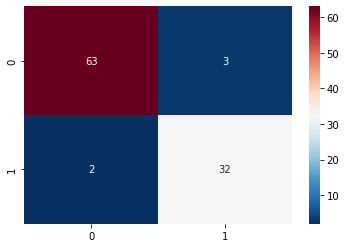

In [25]:
sns.heatmap(mat, annot=True, cmap="RdBu_r")

In [26]:
accuracy = met.accuracy_score(y_train,y_pred)
print("accuracy is:",accuracy)
precision = met.precision_score(y_train,y_pred)
print("precision is", precision)

recall = met.recall_score(y_train,y_pred)
print("recall is", recall)

f1score = met.f1_score(y_train,y_pred)
print("f1 score is",f1score)


accuracy is: 0.95
precision is 0.9142857142857143
recall is 0.9411764705882353
f1 score is 0.9275362318840579


In [27]:
print(met.classification_report(y_train,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.95      0.96        66
        True       0.91      0.94      0.93        34

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100



# Multiclass Regression

In [28]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.33, random_state=42) 

In [29]:
pipe = pip.Pipeline([
    ("scaler", pre.StandardScaler()),
    ("log_reg", lin.LogisticRegression(multi_class="multinomial",
                                        random_state=42,
                                        solver="lbfgs"))
])
params = {
    "log_reg__penalty": ["l1","l2","none"],
    "log_reg__C": [0.1, 1, 10]
}

grid = mod.GridSearchCV(pipe,params,scoring="accuracy",cv=3)
grid.fit(X_train,y_train)

c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\mehmet.sahin\Anaconda3\lib\site-packages\sklearn\linear_model\_log

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(multi_class='multinomial',
                                                           random_state=42))]),
             param_grid={'log_reg__C': [0.1, 1, 10],
                         'log_reg__penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

In [30]:
grid.best_score_

0.9696969696969697

In [31]:
grid.best_params_

{'log_reg__C': 10, 'log_reg__penalty': 'l2'}

In [32]:
y_pred = grid.best_estimator_.predict(X_test)
met.accuracy_score(y_test,y_pred)

0.98